<a href="https://colab.research.google.com/github/RitikDevnani/Amazon-Time-Delivery-Prediction/blob/main/Code/for_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**********
Importing Libraries
**********

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#at first I tried using file in github, but due to large date in volume that through github, it was not able to extract, so I had to use Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**********
Loading the Dataset
**********

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Amazon Delivery Prediction/main_data.csv'
df = pd.read_csv(file_path)
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


**********
Checking the DataSet
**********

In [3]:
print(df.shape)

(43739, 16)


In [4]:
df.info()
df.applymap(type).nunique()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


/tmp/ipython-input-4-447761309.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(type).nunique()


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


**********
Handling the Missing Values
**********

In [5]:
df = df.drop(columns=['Order_ID'])
df.isnull().sum() #to see if any missing data is present or not

,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0
Weather,91


In [6]:
total_rows = df.shape[0]
print(f"Agent_Rating data missing: {54/total_rows:.2%}")
print(f"Weather data missing: {91/total_rows:.2%}")

Agent_Rating data missing: 0.12%
Weather data missing: 0.21%


In [7]:
#For handling missing data of Agent_Rating Feature, I'll use median as it is safest and gives middle value
median_rating = df['Agent_Rating'].median()
df.fillna({'Agent_Rating': median_rating}, inplace=True)
print(df['Agent_Rating'].isnull().sum()) #to check whether it worked or not

0


In [8]:
print(df['Weather'].value_counts())
mode_weather = df['Weather'].mode()[0]  # This will be 'Fog'
df.fillna({'Weather': mode_weather}, inplace=True)
print(df['Weather'].isnull().sum()) #to check whether it worked or not

Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64
0


**********
Checking for Strange Data
**********

<Axes: xlabel='Agent_Age'>

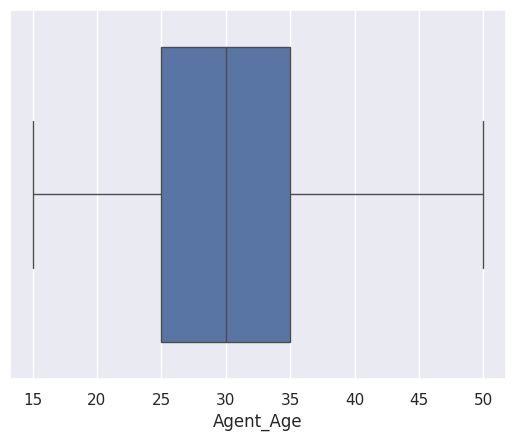

In [9]:
sns.boxplot(x=df['Agent_Age']) #to check for strange data

<Axes: xlabel='Agent_Rating'>

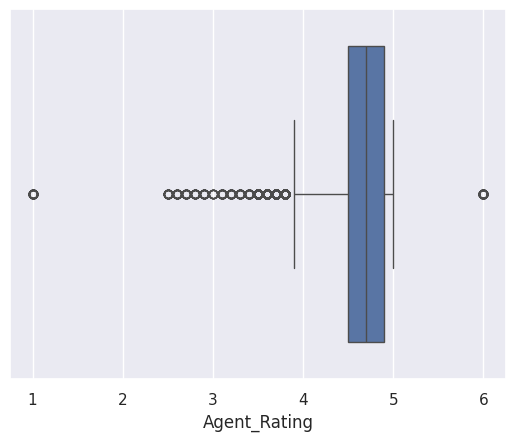

In [10]:
sns.boxplot(x=df['Agent_Rating'])

<Axes: xlabel='Delivery_Time'>

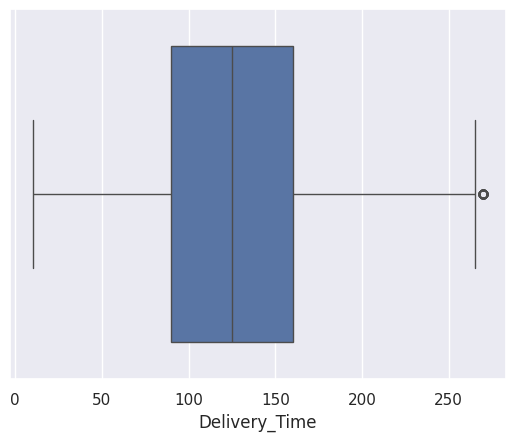

In [11]:
sns.boxplot(x=df['Delivery_Time']) #to check for strange data

I was going through CSV File, and noticed that Missing Drop Latitudes and Longitudes are as "0.0", for both

In [12]:
missing_store_coords = df[(df['Store_Latitude'] == 0.0) | (df['Store_Longitude'] == 0.0)]
print(missing_store_coords[['Drop_Latitude', 'Drop_Longitude']].head())

    Drop_Latitude  Drop_Longitude
33           0.11            0.11
51           0.03            0.03
56           0.08            0.08
58           0.06            0.06
66           0.02            0.02


In [33]:
df_cleaned = df[~((df['Store_Latitude'] == 0.0) | (df['Store_Longitude'] == 0.0))]
df_cleaned = df_cleaned.copy()

In [34]:
checking_missing_store_coords = df_cleaned[(df_cleaned['Store_Latitude'] == 0.0) | (df_cleaned['Store_Longitude'] == 0.0)]
print(checking_missing_store_coords[['Drop_Latitude', 'Drop_Longitude']].head())

Empty DataFrame
Columns: [Drop_Latitude, Drop_Longitude]
Index: []


**********
Creating New Features
**********

In [35]:
#for Order_date
#creating 3 new features from it, Weekdend, Day, Month, Quarter

df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'])

df_cleaned['Weekend'] = df_cleaned['Order_Date'].dt.dayofweek.isin([5, 6]).astype(int) #If Weekdnd 1, else 0
df_cleaned['Day_of_Week'] = df_cleaned['Order_Date'].dt.dayofweek  # Monday = 0

df_cleaned['Month'] = df_cleaned['Order_Date'].dt.month
df_cleaned['Quarter'] = df_cleaned['Order_Date'].dt.quarter

In [36]:
#checking whether it was successful or not

print(df_cleaned.columns)
print(df_cleaned['Weekend'].unique())
print(df_cleaned['Day_of_Week'].value_counts())
print(df_cleaned['Month'].unique())
print(df_cleaned['Quarter'].unique())

#we can see that only 3 months are covered (Feb, March, April)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category', 'Weekend', 'Day_of_Week', 'Month', 'Quarter'],
      dtype='object')
[1 0]
Day_of_Week
2    6281
4    6151
1    5619
3    5611
5    5577
6    5513
0    5482
Name: count, dtype: int64
[3 4 2]
[1 2]


In [37]:
#There was some bad time values in Order_Time, so removed those tests

df_cleaned['Order_Time_converted'] = pd.to_datetime(df_cleaned['Order_Time'], format='%H:%M:%S', errors='coerce')

invalid_order_time_rows = df_cleaned[df_cleaned['Order_Time_converted'].isnull()]

print("Invalid Order_Time values:")
print(invalid_order_time_rows['Order_Time'].unique())

df_cleaned['Order_Time'] = df_cleaned['Order_Time'].replace('NaN ', np.nan)

df_cleaned = df_cleaned.dropna(subset=['Order_Time'])

Invalid Order_Time values:
['NaN ']


In [38]:
#converting to time

df_cleaned['Order_Time'] = pd.to_datetime(df_cleaned['Order_Time'], format='%H:%M:%S')
df_cleaned['Pickup_Time'] = pd.to_datetime(df_cleaned['Pickup_Time'], format='%H:%M:%S')

In [39]:
#adding new feature and removing Pickup Time

def time_to_pickup(row):
    order = row['Order_Time']
    pickup = row['Pickup_Time']
    diff = (pickup - order).total_seconds() / 60
    if diff < 0:
        diff += 24 * 60  # Add 1440 minutes if pickup is after midnight
    return diff

df_cleaned['Time_To_Pickup_Minutes'] = df_cleaned.apply(time_to_pickup, axis=1)

print(df_cleaned['Time_To_Pickup_Minutes'].head())

df_cleaned = df_cleaned.drop(columns=['Pickup_Time'])

0    15.0
1     5.0
2    15.0
3    10.0
4    15.0
Name: Time_To_Pickup_Minutes, dtype: float64


In [40]:
#adding 2 new features and removing Order Time

def order_time_category(hour):
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Midnight'

df_cleaned['Order_Hour'] = df_cleaned['Order_Time'].dt.hour
df_cleaned['Order_Time_Category'] = df_cleaned['Order_Hour'].apply(order_time_category)

print(df_cleaned['Order_Time_Category'].head())

df_cleaned = df_cleaned.drop(columns=['Order_Time', 'Order_Time_converted'])

0      Morning
1      Evening
2      Morning
3      Evening
4    Afternoon
Name: Order_Time_Category, dtype: object


In [41]:
#adding new feature and removing latitudes and longitudes of both store and drop location

def distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth radius in kilometers
    return km

df_cleaned['Distance_km'] = distance(df_cleaned['Store_Latitude'], df_cleaned['Store_Longitude'], df_cleaned['Drop_Latitude'], df_cleaned['Drop_Longitude'])

print(df_cleaned['Distance_km'].head())

df_feature = df_cleaned.drop(columns=['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'])
df_feature = df_feature.copy()

0     3.025149
1    20.183530
2     1.552758
3     7.790401
4     6.210138
Name: Distance_km, dtype: float64


**********
Converting Categorical Data to Numerical Data
**********

In [42]:
print(df_feature.info())
print(df_feature.select_dtypes(include=['object', 'category']).columns)

<class 'pandas.core.frame.DataFrame'>
Index: 40153 entries, 0 to 43738
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Agent_Age               40153 non-null  int64         
 1   Agent_Rating            40153 non-null  float64       
 2   Order_Date              40153 non-null  datetime64[ns]
 3   Weather                 40153 non-null  object        
 4   Traffic                 40153 non-null  object        
 5   Vehicle                 40153 non-null  object        
 6   Area                    40153 non-null  object        
 7   Delivery_Time           40153 non-null  int64         
 8   Category                40153 non-null  object        
 9   Weekend                 40153 non-null  int64         
 10  Day_of_Week             40153 non-null  int32         
 11  Month                   40153 non-null  int32         
 12  Quarter                 40153 non-null  int32      